# Assignment- 6 : K-Means Clustering

# Problem Statement-

Assignment on Clustering Techniques
Download the customer dataset from link:
Data Set: https://www.kaggle.com/shwetabh123/mall•customers
This dataset gives the data of Income and money spent by the customers visiting a Shopping Mall. The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. Therefore, as a mall owner you need to find the group of people who are the profitable customers for the mall owner. Apply at least two clustering algorithms (based on Spending Score) to find the group of customers. A. Apply Data pre•processing (Label Encoding , Data Transformation. ) techniques if necessary.
A.	Perform data•preparation( Train•Test Split)
B.	Apply Machine Learning Algorithm
C.	Evaluate Model.
D.	Apply Cross•Validation and Evaluate Model


# importing python libraries

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
import numpy as np

# Loading the dataset into a dataframe

In [2]:
A=pd.read_csv(r"C:\Users\HP\Desktop\Mall_Customers.csv")
A

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# counting the total number of null values in each column

In [3]:
A.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# dtype function returns the data type of each column

In [4]:
A.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# renaming the column "Genre" to "Gender"

In [5]:
A.rename(columns={"Genre":"Gender"})

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# applying label encoding to "Genre" column

In [6]:
#from sklearn import preprocessing
  
#label_encoder = preprocessing.LabelEncoder()
  
#A['Genre']= label_encoder.fit_transform(A['Genre'])

#A['Genre']

In [7]:
A.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Dropping the "Customer Id" column

In [8]:
#.drop(["CustomerID"],axis=1,inplace=True)
A.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# importing Kmeans class from sklearn library

In [9]:
from sklearn.cluster import KMeans

x=A.iloc[:,[3,4]].values

# Using the elbow method to find the optimal number of clusters

In [10]:
wcss = [] 
for i in range (1, 11): 
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42) 
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

# Plotting the elbow method

<function matplotlib.pyplot.show(close=None, block=None)>

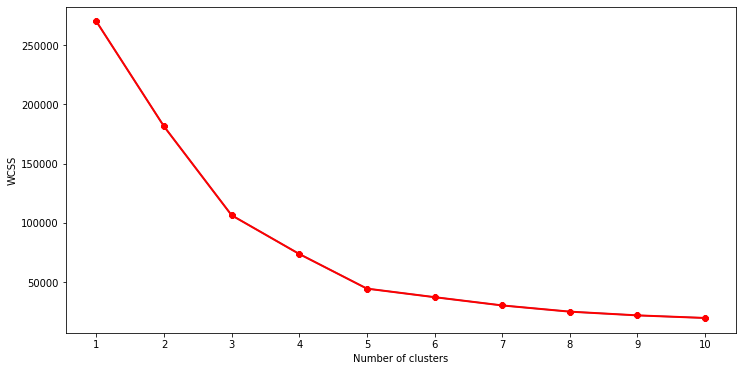

In [11]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("Number of clusters")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show

# Training the K-Means model on the dataset 

In [12]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state = 42)

y_predict=kmeans.fit_predict(x)


print(y_predict)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


# Visualising the clusters

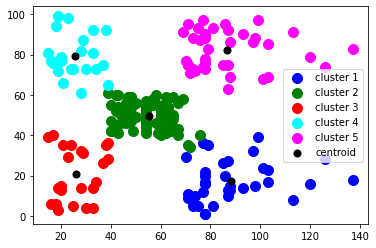

In [15]:
plt.scatter(x[y_predict==1,0], x[y_predict == 1,1], s=100, c='blue', label='cluster 1') 
plt.scatter(x[y_predict==0,0], x[y_predict == 0,1], s=100, c='green', label='cluster 2') 
plt.scatter(x[y_predict==2,0], x[y_predict == 2,1], s=100, c='red', label='cluster 3')
plt.scatter(x[y_predict==3,0], x[y_predict == 3,1], s=100, c='cyan', label='cluster 4') 
plt.scatter(x[y_predict==4,0], x[y_predict == 4,1], s=100, c='magenta', label='cluster 5') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='black', label='centroid')

plt.legend()
plt.show()

# For Agglomerative Clustering: Plotting the dendogram

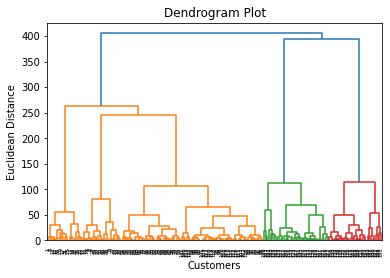

In [16]:
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(x, method='ward')) 
plt.title('Dendrogram Plot')
plt.ylabel('Euclidean Distance') 
plt.xlabel('Customers') 
plt.show()
